<a href="https://colab.research.google.com/github/ndb796/Data-Analysis-Basic-for-KISA/blob/main/Boston_Housing_Data_Analysis_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Boston 주택 가격 데이터셋 불러오기 및 데이터셋 나누기 train : val : test = 8 : 1 : 1**

In [16]:
# 보스턴(Boston) 데이터 셋을 포함한 라이브러리를 불러옵니다.
from sklearn.datasets import load_boston

dataset = load_boston()

In [17]:
# 데이터 셋을 자유자재로 나누어 처리하기 위하여, 추가적으로 라이브러리를 불러옵니다.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

In [18]:
# 데이터 셋이 train : test : val = 8 : 1 : 1로 잘 나누어 졌는지 확인하기
print('Dataset Division →', len(x_train), ':', len(x_test), ':', len(x_val))

Dataset Division → 404 : 51 : 51


#### **Pandas로 데이터셋 살펴보기**

In [19]:
import pandas as pd

# 판다스(Pandas) 객체 초기화
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df['PRICE'] = dataset.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# 판다스(Pandas) 객체 초기화
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df['PRICE'] = dataset.target

# 전체 데이터셋이 잘 구성되어 있는지 시각화
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### **가격(Target)과 가장 큰 연관성을 가지는 변수(Variable)을 분석하기**

* 목표(target) 값과 크게 영향력을 끼치는 일부 특징(feature)이 있을 것입니다.
* 따라서 시각화 라이브러리를 이용하여 목표(target)와 가장 큰 상관관계를 가지는 특징을 찾아볼 수 있습니다.

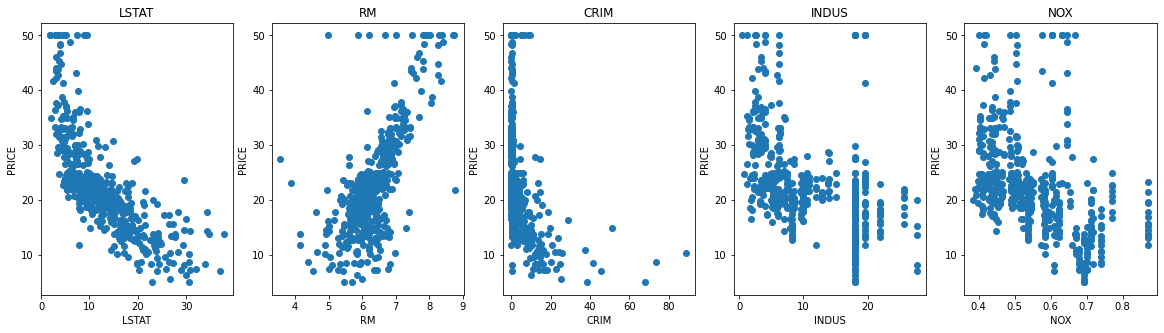

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# 비교할 특징(Feature) 이름들
features = ['LSTAT', 'RM', 'CRIM', 'INDUS', 'NOX']
target = df['PRICE']

for i, feature in enumerate(features):
    # 여러 개의 그림으로 한 장의 이미지를 만듭니다.
    plt.subplot(1, len(features) , i + 1)

    # 각 특징(Feature)과 목표(Target) 값을 비교합니다.
    x = df[feature]
    y = target
    
    # 스캐터(Scatter) 도표를 그립니다.
    plt.scatter(x, y, marker='o')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('PRICE')

* 파이썬 시각화 라이브러리를 활용한 시각화 결과는 위 그림과 같습니다.
* RM (주택 1가구당 평균 방의 개수), LSTAT (모집단의 하위 계층 비율) 특징들이 선형적으로 밀접하게 연관성이 있는 것을 알 수 있습니다.

#### **상관 계수 히트맵(Heat Map) 그리기**

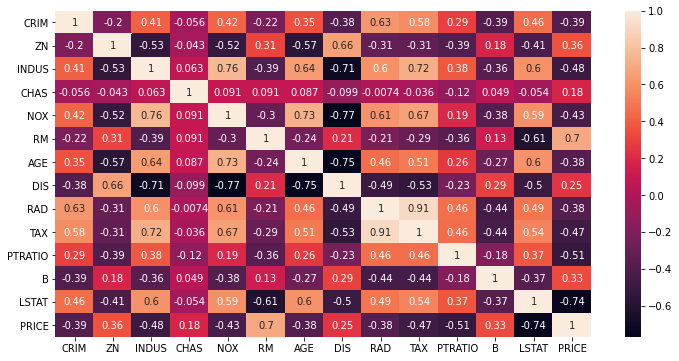

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)